In [49]:
import numpy as np

dati = np.random.normal(loc= 2000, scale = 500 , size = 365)
dati = dati.astype(int)
tasso_crescita_mensile = 0.03
dati

array([1669, 2538, 1842, 1816, 2754, 3233, 1875, 2053, 2748, 2844, 2091,
       1849, 2085, 1799, 2180, 2405, 1743, 2306, 2573, 1860, 3277, 1898,
       1891, 2133, 2278, 3008, 1688, 1630, 2589, 2581, 1589, 1768, 1802,
       1127, 2125, 2089, 1917, 2197, 2020, 1499, 1678, 2883, 1751, 1809,
       1949, 1991, 2208, 1662, 1660, 1708, 2234, 1899, 1965, 2261, 2323,
       1617, 1973, 1958, 1995, 1139, 2687, 2862, 1334,  605, 1577, 1892,
       2811, 1830, 1879, 2131, 1428,  709, 1825, 2100, 2542, 1779, 1713,
       1467, 2159, 1668, 1336, 1402, 2265, 2258, 2410,  796,  786, 2483,
       2910, 1403, 2362, 2363, 1798, 2417, 1885, 2274, 2662, 1787, 2131,
        810, 1887, 1782, 1552, 2331, 2341, 2013, 1684,  770, 1900, 1876,
       2170, 2176, 1895, 2371, 3086, 1178, 2121, 2574, 1071, 2064, 1513,
       3003, 2256, 1572, 2710, 2115, 1914, 2466, 1966, 1743, 2095, 1941,
       1773, 2295, 2605, 2214, 1977, 2916, 1389, 2267, 2031, 2288, 1744,
       1939, 2894, 2713, 1893, 1573, 1924, 2698, 26

In [50]:
aumenti_1 = np.random.uniform(0.0, 0.05, size=91)
aumenti_2 = np.random.uniform(0.05, 0.10, size=91)
aumenti_3 = np.random.uniform(0.10, 0.15, size=91)
aumenti_4 = np.random.uniform(0.15, 0.20, size=92)

percentuali_aumento = np.concatenate((aumenti_1, aumenti_2, aumenti_3, aumenti_4))

In [51]:
dati_finali = dati * (1 + percentuali_aumento)
dati_finali = dati_finali.astype(int)
dati_finali

array([1675, 2583, 1870, 1832, 2795, 3334, 1932, 2080, 2783, 2864, 2185,
       1888, 2085, 1805, 2194, 2457, 1827, 2312, 2699, 1882, 3359, 1912,
       1974, 2207, 2334, 3135, 1748, 1691, 2704, 2709, 1622, 1833, 1876,
       1139, 2194, 2132, 1966, 2247, 2049, 1561, 1708, 2961, 1837, 1888,
       2042, 2003, 2286, 1729, 1707, 1780, 2313, 1954, 2018, 2299, 2433,
       1663, 2038, 2051, 2054, 1141, 2718, 2911, 1351,  607, 1591, 1956,
       2846, 1889, 1890, 2234, 1464,  736, 1868, 2161, 2611, 1814, 1778,
       1482, 2231, 1691, 1362, 1438, 2371, 2269, 2525,  814,  793, 2580,
       3015, 1406, 2372, 2535, 1891, 2653, 1998, 2401, 2914, 1907, 2258,
        870, 2026, 1922, 1676, 2526, 2482, 2185, 1827,  825, 2055, 1980,
       2322, 2365, 2079, 2571, 3297, 1254, 2263, 2734, 1157, 2170, 1663,
       3255, 2442, 1700, 2868, 2311, 2099, 2643, 2147, 1880, 2227, 2040,
       1882, 2471, 2751, 2330, 2127, 3143, 1471, 2456, 2169, 2423, 1909,
       2125, 3063, 2928, 2053, 1672, 2110, 2842, 28

In [52]:
import pandas as pd
date = pd.date_range(start="2024-01-01", periods=365, freq='D').strftime('%d-%m')

df = pd.DataFrame({'Visitatori': dati_finali}, index=date)

In [53]:
media_mese = {}
std_mese = {}

for mese in range(1, 13):  
    
    mese_str = f'{mese:02d}'  
    visitatori_mese = df[df.index.str.endswith(mese_str)]['Visitatori']
    
    media_mese[mese] = visitatori_mese.mean()
    std_mese[mese] = visitatori_mese.std()

In [56]:
df

,Visitatori
01-01,1675
02-01,2583
03-01,1870
04-01,1832
05-01,2795
...,...
26-12,2066
27-12,2195
28-12,2532
29-12,3412


In [59]:
df['media_mobile'] = df['Visitatori'].rolling(window=7).mean()

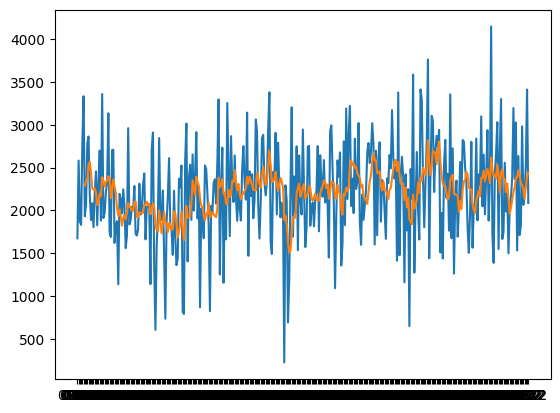

In [60]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Visitatori'], label='Visitatori')
plt.plot(df.index, df['media_mobile'])

plt.show()

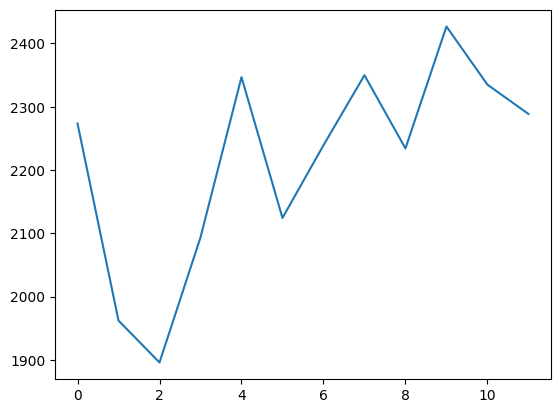

In [61]:
media_valori = list(media_mese.values())
plt.plot(media_valori)

plt.show()